In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import date
from datetime import datetime

%matplotlib inline

In [2]:
headway = pd.read_csv('../data/Headway Data.csv')
bna_2022 = pd.read_csv('../data/bna_2022.csv')
bna_weather = pd.read_csv('../data/bna_weather.csv')

In [3]:
pd.set_option('display.max_columns', None) ##untruncates df
##pd.reset_option(“max_columns”) this resets back to default
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [4]:
headway.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MCC4_20,2.0,2,36.167091,-86.781923,15:30:00,15:26:05,15:27:46,2.233333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [5]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [6]:
headway.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
count,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981674e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.927285e+06,1.549421e+06,1.507891e+06,1.507347e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.579068e+06,1.981715e+06,1.981715e+06,1.927259e+06
mean,1.202191e+08,1.301276e+00,8.440206e+07,3.933449e+01,3.947508e+03,1.635251e+03,3.111437e+05,9.984281e-03,7.122218e+00,5.848394e-01,3.616027e+01,-8.676758e+01,-2.193849e+00,1.864981e+01,1.898972e+01,3.647395e-01,2.738487e-02,1.057655e-01,8.393836e-01,2.552234e-02,2.351577e-02,1.275310e-02,3.254840e+02,2.856618e+00
std,3.423559e+03,6.398457e-01,4.330643e+06,1.969928e+01,1.973956e+03,6.375643e+02,7.312918e+03,1.291578e-01,3.828157e+00,7.959966e-01,5.936899e-02,6.353687e-02,4.886912e+00,1.217166e+01,1.395040e+01,6.579797e+00,1.632022e-01,3.075373e-01,3.671769e-01,1.577053e-01,1.515348e-01,1.122072e-01,2.353626e+02,5.986122e+00
min,1.202111e+08,1.000000e+00,7.644716e+07,3.000000e+00,3.000000e+02,0.000000e+00,2.977490e+05,0.000000e+00,1.000000e+00,0.000000e+00,3.604893e+01,-8.695566e+01,-5.067667e+02,0.000000e+00,0.000000e+00,-2.220667e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-1.135833e+02
25%,1.202202e+08,1.000000e+00,8.075122e+07,2.300000e+01,2.301000e+03,1.222000e+03,3.047570e+05,0.000000e+00,4.000000e+00,0.000000e+00,3.612717e+01,-8.680461e+01,-3.400000e+00,1.000000e+01,1.101667e+01,-1.883334e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.380000e+02,0.000000e+00
50%,1.202205e+08,1.000000e+00,8.470092e+07,5.200000e+01,5.200000e+03,1.733000e+03,3.097210e+05,0.000000e+00,6.000000e+00,0.000000e+00,3.615404e+01,-8.677432e+01,-1.383333e+00,1.500000e+01,1.618333e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+02,0.000000e+00
75%,1.202208e+08,1.000000e+00,8.828194e+07,5.500000e+01,5.506000e+03,2.161000e+03,3.174720e+05,0.000000e+00,1.000000e+01,1.000000e+00,3.617975e+01,-8.671410e+01,-1.333330e-01,2.000000e+01,2.306667e+01,1.966666e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.610000e+02,2.183333e+00
max,1.202211e+08,3.000000e+00,9.109076e+07,5.600000e+01,9.975000e+03,2.255400e+04,3.300110e+05,6.000000e+00,1.700000e+01,2.000000e+00,3.630797e+01,-8.663650e+01,7.883333e+01,5.030000e+02,1.084617e+03,1.054617e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.322000e+03,4.271667e+02


In [7]:
headway = headway.drop(headway.columns[[22, 23, 24, 25, 26, 27, 28, 29]], axis=1)
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [8]:
route55 = headway.loc[headway['ROUTE_ABBR']==55]
route55

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980230,120221101,1,91054163,2022-11-01,55,5594,2041,328691,0,TO DOWNTOWN,MCC4_15,5.0,2,36.167091,-86.781923,07:30:00,07:30:03,07:35:22,-5.366666,NaN,NaN,NaN
1981375,120221101,1,91055687,2022-11-01,55,6401,2029,329206,0,TO DOWNTOWN,ARTS,7.0,1,36.131395,-86.740400,15:12:00,15:05:58,15:11:33,0.450000,NaN,0.35,NaN
1981376,120221101,1,91055688,2022-11-01,55,6401,2029,329206,0,TO DOWNTOWN,MCC4_22,2.0,2,36.167091,-86.781923,15:45:00,15:41:47,15:43:59,1.016666,NaN,NaN,NaN
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,ARTS,7.0,1,36.131395,-86.740400,15:12:00,14:39:16,15:11:12,0.800000,0.0,NaN,NaN


In [9]:
route55 = route55.loc[route55['DATE'] == '2021-11-01']
route55 = route55.loc[route55['OPERATOR'] == 1716]
route55

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,120211101,1,76452804,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,14:12:00,14:12:50,14:12:50,-0.833333,10.0,11.183333,1.183333
3382,120211101,1,76452805,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,14:20:00,14:21:21,14:21:21,-1.350000,10.0,11.666666,1.666666
3383,120211101,1,76452806,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,14:28:00,14:27:26,14:27:26,0.566666,10.0,11.150000,1.150000
3384,120211101,1,76452807,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,14:40:00,14:40:39,14:40:39,-0.650000,10.0,12.750000,2.750000


In [10]:
route55all = headway.loc[(headway['ROUTE_ABBR']==55) & (headway['DATE'] == '2021-11-01')]
route55all.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN


In [11]:
route55all['HEADWAY_DEV_PERC'] = (route55all['HDWY_DEV']/route55all['SCHEDULED_HDWY'])*100
route55all.head(20)

C:\Users\jamor\AppData\Local\Temp/ipykernel_3592/3858480699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route55all['HEADWAY_DEV_PERC'] = (route55all['HDWY_DEV']/route55all['SCHEDULED_HDWY'])*100


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN,NaN
3325,120211101,1,76452748,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MCC4_15,4.0,2,36.167091,-86.781923,05:05:00,05:05:16,05:05:16,-0.266666,NaN,NaN,NaN,NaN
3326,120211101,1,76452749,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MCC4_15,4.0,1,36.167091,-86.781923,05:15:00,05:05:16,05:14:04,0.933333,NaN,NaN,NaN,NaN
3327,120211101,1,76452750,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MXWHARF,5.0,0,36.148839,-86.762710,05:24:00,05:26:07,05:26:07,-2.116666,NaN,NaN,NaN,NaN
3328,120211101,1,76452751,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MXTHOMP,7.0,0,36.128164,-86.713199,05:35:00,05:36:20,05:36:20,-1.333333,NaN,NaN,NaN,NaN
3329,120211101,1,76452752,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MXDONEL,8.0,0,36.105615,-86.672004,05:41:00,05:41:16,05:41:16,-0.266666,NaN,NaN,NaN,NaN


In [12]:
route55all = route55all.loc[route55all['SCHEDULED_TIME'] > '06:00:00']
route55all.head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
3332,120211101,1,76452755,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,06:04:00,05:53:07,06:04:49,-0.816666,10.0,9.100000,-0.900000,-9.000000
3333,120211101,1,76452756,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,06:12:00,06:12:56,06:12:56,-0.933333,10.0,10.600000,0.600000,6.000000
3334,120211101,1,76452757,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,06:20:00,06:23:14,06:23:14,-3.233333,10.0,13.183333,3.183333,31.833330
3335,120211101,1,76452758,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,06:28:00,06:28:00,06:28:00,0.000000,10.0,9.716666,-0.283334,-2.833340
3336,120211101,1,76452759,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,06:40:00,06:39:58,06:39:58,0.033333,10.0,10.366666,0.366666,3.666660
3337,120211101,1,76452760,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MCC4_15,4.0,2,36.167091,-86.781923,06:55:00,06:54:06,06:54:06,0.900000,NaN,NaN,NaN,NaN
3338,120211101,1,76452761,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MCC4_15,4.0,1,36.167091,-86.781923,07:05:00,06:54:09,07:04:52,0.133333,10.0,9.066666,-0.933334,-9.333340
3339,120211101,1,76452762,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MXWHARF,5.0,0,36.148839,-86.762710,07:15:00,07:19:01,07:19:01,-4.016666,10.0,13.783333,3.783333,37.833330
3340,120211101,1,76452763,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MXTHOMP,7.0,0,36.128164,-86.713199,07:27:00,07:30:10,07:30:10,-3.166666,10.0,12.333333,2.333333,23.333330
3341,120211101,1,76452764,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MXDONEL,8.0,0,36.105615,-86.672004,07:33:00,07:36:26,07:36:26,-3.433333,10.0,11.000000,1.000000,10.000000


In [13]:
route55all.groupby(['TRIP_ID']).agg({'HEADWAY_DEV_PERC':['mean']})

,HEADWAY_DEV_PERC
,mean
TRIP_ID,
300287,14.299996
300288,-11.666670
300289,-11.251518
300290,-3.746468
300291,0.418179
...,...
300664,-2.475006
300665,0.466662


In [14]:
headway['HEADWAY_DEV_PERC'] = (headway['HDWY_DEV']/headway['SCHEDULED_HDWY'])*100

headway.groupby(['ROUTE_STOP_SEQUENCE']).agg({'HEADWAY_DEV_PERC':['mean']})

,HEADWAY_DEV_PERC
,mean
ROUTE_STOP_SEQUENCE,
1.0,1.335539
2.0,1.577830
3.0,2.763753
4.0,2.184310
5.0,2.003815
6.0,NaN
7.0,NaN
8.0,1.461565


In [15]:
headway['DATE'] =  pd.to_datetime(headway['DATE'])
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN


In [16]:
headway['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in headway['DATE']]
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,WEEKDAY
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,Monday
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,Monday
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,Monday
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,Monday
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN,Tuesday
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670,Tuesday
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN,Tuesday
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN,Tuesday


In [17]:
headway = headway.iloc[:,[0,1,2,3,23,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [18]:
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
0,120211101,1,76447164,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664
1,120211101,1,76447165,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521
2,120211101,1,76447166,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,Tuesday,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN
1981711,120221101,1,91057851,2022-11-01,Tuesday,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670
1981712,120221101,1,91057852,2022-11-01,Tuesday,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN
1981713,120221101,1,91057881,2022-11-01,Tuesday,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN


In [19]:
headway.groupby(['WEEKDAY', 'ROUTE_ABBR']).agg({'HEADWAY_DEV_PERC':['mean']})

HEADWAY_DEV_PERC
                                 mean
WEEKDAY   ROUTE_ABBR                 
Friday    3                  3.169301
          7                  2.358121
          22                 2.953112
          23                 1.933215
          50                      NaN
          52                 2.311829
          55                      NaN
          56                      NaN
Monday    3                  2.189212
          7                  2.457064
          22                 2.419313
          23                 1.313373
          50                      NaN
          52                 1.515658
          55                      NaN
          56                      NaN
Saturday  3                  2.482695
          7                  1.320126
          22                 2.049828
          23                 4.626246
          50                 1.325420
          52                 2.812956
          55                 1.281303
          56                 2.007446
Sunday    3                  1.913209
          7                  1.891951
          22                 1.735500
          23                 2.973863
          50                 1.504181
          52                 1.548602
          55                 1.056402
          56                 1.668420
Thursday  3                  3.686136
          7                  2.889221
          22                 3.753033
          23                 2.685342
          50                      NaN
          52                 3.367679
          55                      NaN
          56                      NaN
Tuesday   3                  2.467695
          7                  2.072685
          22                 3.279401
          23                 1.393201
          50                      NaN
          52                 1.574913
          55                      NaN
          56                      NaN
Wednesday 3                  4.004944
          7                  2.383650
          22                 4.265312
          23                 2.571053
          50                      NaN
          52                 2.901542
          55                      NaN
          56                      NaN

In [20]:
headway.dropna()
headway.groupby(['WEEKDAY']).agg(ad_mean=('HEADWAY_DEV_PERC', np.nanmean)).sort_values(by='WEEKDAY', ascending=False)

,ad_mean
WEEKDAY,
Wednesday,NaN
Tuesday,NaN
Thursday,NaN
Sunday,1.712273
Saturday,2.197958
Monday,NaN
Friday,NaN


In [21]:
hw = headway.dropna()
hw

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
0,120211101,1,76447164,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664
1,120211101,1,76447165,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521
12,120211101,1,76447976,2021-11-01,Monday,22,2200,1352,298128,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,-1.047620
13,120211101,1,76447977,2021-11-01,Monday,22,2200,1352,298128,0,TO DOWNTOWN,ELIZ,11.0,0,36.193454,-86.839981,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666,2.476189
14,120211101,1,76447978,2021-11-01,Monday,22,2200,1352,298128,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667,-6.777780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981695,120221101,1,91056031,2022-11-01,Tuesday,7,706,375,329461,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,17:07:00,17:08:19,17:08:19,-1.316666,18.0,16.850000,-1.150000,-6.388889
1981696,120221101,1,91056032,2022-11-01,Tuesday,7,706,375,329461,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,17:16:00,17:22:47,17:22:47,-6.783333,17.0,14.500000,-2.500000,-14.705882
1981698,120221101,1,91056034,2022-11-01,Tuesday,7,706,375,329459,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,17:45:00,17:46:10,17:46:10,-1.166666,15.0,13.116666,-1.883334,-12.555560
1981699,120221101,1,91056035,2022-11-01,Tuesday,7,706,375,329459,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,18:01:00,18:05:13,18:05:13,-4.216666,14.0,7.483333,-6.516667,-46.547621


In [22]:
##this doesn't work for some reason
hw.groupby(['WEEKDAY']).agg({'HEADWAY_DEV_PERC':['mean']})

,HEADWAY_DEV_PERC
,mean
WEEKDAY,
Friday,NaN
Monday,NaN
Saturday,2.197760
Sunday,1.712151
Thursday,NaN
Tuesday,NaN
Wednesday,NaN


In [23]:
headway.loc[headway['WEEKDAY'] == 'Saturday']

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
29527,120211106,2,76676686,2021-11-06,Saturday,22,2200,2062,298180,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,04:45:00,04:38:01,04:46:18,-1.300000,NaN,NaN,NaN,NaN
29528,120211106,2,76676687,2021-11-06,Saturday,22,2200,2062,298180,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,04:54:00,04:53:24,04:53:24,0.600000,NaN,NaN,NaN,NaN
29529,120211106,2,76676688,2021-11-06,Saturday,22,2200,2062,298180,0,TO DOWNTOWN,MCC5_12,4.0,2,36.167091,-86.781923,05:10:00,05:01:04,05:01:04,8.933333,NaN,NaN,NaN,NaN
29530,120211106,2,76676689,2021-11-06,Saturday,22,2200,2062,298198,0,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,-86.781923,05:15:00,05:01:07,05:15:43,-0.716666,NaN,NaN,NaN,NaN
29531,120211106,2,76676690,2021-11-06,Saturday,22,2200,2062,298198,0,FROM DOWNTOWN,CV23,6.0,0,36.183480,-86.814220,05:26:00,05:24:37,05:24:37,1.383333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965107,120221029,2,91080645,2022-10-29,Saturday,7,702,2312,329377,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:41:42,22:41:42,-18.700000,30.0,46.666666,16.666666,55.555553
1965108,120221029,2,91080646,2022-10-29,Saturday,7,702,2312,329377,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:56:23,22:56:23,-18.383333,NaN,NaN,NaN,NaN
1965109,120221029,2,91080647,2022-10-29,Saturday,7,702,2312,329365,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:56:23,22:56:23,-11.383333,30.0,36.916666,6.916666,23.055553
1965110,120221029,2,91080648,2022-10-29,Saturday,7,702,2312,329365,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:20:37,23:20:37,-21.616666,30.0,46.583333,16.583333,55.277777


In [24]:
##takes too long to run- will run at a later time
# For loop to determine whether the time is rush hour using 'SCHEDULED_TIME' column, create 'RUSH_HOUR' column
#headway['RUSH_HOUR'] = ''
#for ind, row in headway.itterows():
#    if row['SCHEDULED_TIME'] >= '07:00:00' and row['SCHEDULED_TIME'] <= '09:30:00':
#        headway.loc[ind, 'RUSH_HOUR'] = 'Morning Rush'
#    elif row['SCHEDULED_TIME'] >= '16:00:00' and row['SCHEDULED_TIME'] <= '18:00:00':
#        headway.loc[ind, 'RUSH_HOUR'] ='Evening Rush'
#    else:
#        headway.loc[ind, 'RUSH_HOUR'] ='Not Rush'
#headway.head()

In [27]:
mon = headway.loc[headway['WEEKDAY']=='Monday']
tue = headway.loc[headway['WEEKDAY']=='Tueday']
wed = headway.loc[headway['WEEKDAY']=='Wednesday']
thu = headway.loc[headway['WEEKDAY']=='Thursday']
fri = headway.loc[headway['WEEKDAY']=='Friday']
sat = headway.loc[headway['WEEKDAY']=='Saturday']
sun = headway.loc[headway['WEEKDAY']=='Sunday']

In [50]:
##initialize empty list to fill with results
ON_TIME_PERF = []

##loop to check adherence column to determine if early, late, or on time
for x in mon['ADHERENCE']:
    if x < 0:
        ON_TIME_PERF.append('EARLY')
    elif x > 0:
        ON_TIME_PERF.append('LATE')
    else:
        ON_TIME_PERF.append('ON TIME')
ON_TIME_PERF

['EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'LATE',
 'EARLY',
 'ON TIME',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'ON TIME',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EAR

In [51]:
##initialize empty list to fill with results
ON_TIME_PERF = []

##loop to check adherence column to determine if early, late, or on time
for x in headway['ADHERENCE']:
    if x < 0:
        ON_TIME_PERF.append('EARLY')
    elif x > 0:
        ON_TIME_PERF.append('LATE')
    else:
        ON_TIME_PERF.append('ON TIME')
ON_TIME_PERF

['EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'LATE',
 'EARLY',
 'ON TIME',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'ON TIME',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EAR

In [57]:
##convert to df
on_time_perf = pd.DataFrame(ON_TIME_PERF)
on_time_perf.columns = ['ON_TIME_PERF']

##add to main df by concat function
headway = pd.concat([headway, on_time_perf], axis='columns')
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF
0,120211101,1,76447164,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,EARLY
1,120211101,1,76447165,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,EARLY
2,120211101,1,76447166,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,EARLY
3,120211101,1,76447167,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,EARLY
4,120211101,1,76447168,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,LATE


In [60]:
hw_clean = headway.drop(['CALENDAR_ID', 'SERVICE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'OVERLOAD_ID', 'TIME_POINT_ABBR'], axis=1)
hw_clean

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,EARLY
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,EARLY
2,76447166,2021-11-01,Monday,7,297750,TO DOWNTOWN,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,EARLY
3,76447167,2021-11-01,Monday,50,297749,TO DOWNTOWN,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,EARLY
4,76447168,2021-11-01,Monday,50,297749,TO DOWNTOWN,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,LATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,91057724,2022-11-01,Tuesday,50,329980,TO DOWNTOWN,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN,EARLY
1981711,91057851,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670,LATE
1981712,91057852,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN,LATE
1981713,91057881,2022-11-01,Tuesday,56,330011,TO DOWNTOWN,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN,LATE


In [63]:
##get count of on time perf per day

mon = hw_clean.loc[hw_clean['WEEKDAY']=='Monday']
tue = hw_clean.loc[hw_clean['WEEKDAY']=='Tuesday']
wed = hw_clean.loc[hw_clean['WEEKDAY']=='Wednesday']
thu = hw_clean.loc[hw_clean['WEEKDAY']=='Thursday']
fri = hw_clean.loc[hw_clean['WEEKDAY']=='Friday']
sat = hw_clean.loc[hw_clean['WEEKDAY']=='Saturday']
sun = hw_clean.loc[hw_clean['WEEKDAY']=='Sunday']

print('monday')
print(mon['ON_TIME_PERF'].value_counts())
print('')
print('tueday')
print(tue['ON_TIME_PERF'].value_counts())
print('')
print('wednesday')
print(wed['ON_TIME_PERF'].value_counts())
print('')
print('thursday')
print(thu['ON_TIME_PERF'].value_counts())
print('')
print('friday')
print(fri['ON_TIME_PERF'].value_counts())
print('')
print('saturday')
print(sat['ON_TIME_PERF'].value_counts())
print('')
print('sunday')
print(sun['ON_TIME_PERF'].value_counts())
print('')


monday
EARLY      239369
LATE        71324
ON TIME      8118
Name: ON_TIME_PERF, dtype: int64

tueday
EARLY      251037
LATE        70162
ON TIME      7960
Name: ON_TIME_PERF, dtype: int64

wednesday
EARLY      243731
LATE        66838
ON TIME     12465
Name: ON_TIME_PERF, dtype: int64

thursday
EARLY      241403
LATE        65762
ON TIME     12087
Name: ON_TIME_PERF, dtype: int64

friday
EARLY      243201
LATE        61969
ON TIME      9848
Name: ON_TIME_PERF, dtype: int64

saturday
EARLY      153800
LATE        39433
ON TIME      6157
Name: ON_TIME_PERF, dtype: int64

sunday
EARLY      132869
LATE        39666
ON TIME      4516
Name: ON_TIME_PERF, dtype: int64



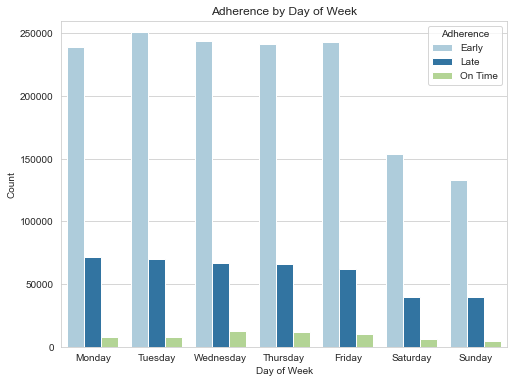

In [66]:
##chart to compare adherence per day

early = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                       'y':[239369, 251037, 243731, 241403, 243201, 153800, 132869]})
late = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         'y':[71324, 70162, 66838, 65762, 61969, 39433, 39666]})
ontime = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                          'y':[8118, 7960, 12465, 12087, 9848, 6157, 4516]})

early['Adherence']='Early'
late['Adherence']='Late'
ontime['Adherence']='On Time'
res=pd.concat([early, late, ontime])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Adherence', palette='Paired', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.ylim(0, 260000)
plt.title('Adherence by Day of Week')
plt.savefig('adh-by-dow.png')
plt.show()

In [ ]:
##create table that looks at 2 hours intervals
##create table for school year and table for out of school year to look at impact on headway dev